In [113]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [114]:

# Loading the trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


In [115]:

# Adding custom layers
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)  
output = Dense(10, activation='softmax')(x)  

# Creating the model
model = Model(inputs=base_model.input, outputs=output)


In [116]:

# Freezing the base model layers 
for layer in base_model.layers:
    layer.trainable = False


In [117]:

# Compiling the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


In [118]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,         
    width_shift_range=0.2,     
    height_shift_range=0.2,    
    shear_range=0.15,          
    zoom_range=0.15,           
    horizontal_flip=True,      
    fill_mode='nearest'        
)

datagen.fit(X_train)


In [119]:

# Training the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 402s 501ms/step - accuracy: 0.4716 - loss: 1.5353 - val_accuracy: 0.5678 - val_loss: 1.2420
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 383s 490ms/step - accuracy: 0.5867 - loss: 1.1913 - val_accuracy: 0.5819 - val_loss: 1.2026
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 398s 509ms/step - accuracy: 0.6079 - loss: 1.1291 - val_accuracy: 0.5857 - val_loss: 1.1722
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 425s 543ms/step - accuracy: 0.6230 - loss: 1.0813 - val_accuracy: 0.5970 - val_loss: 1.1522
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 332s 424ms/step - accuracy: 0.6371 - loss: 1.0354 - val_accuracy: 0.6048 - val_loss: 1.1304
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 354s 453ms/step - accuracy: 0.6469 - loss: 1.0111 - val_accuracy: 0.6097 - val_loss: 1.1109
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 354s 453ms/step - accuracy: 0.6603 - loss: 0.9732 - val_accuracy: 0.6080 - val_loss: 1.1166
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 348s 445ms/step - accuracy: 0.6678 -

In [120]:

# Evaluating the model 
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 75s 239ms/step - accuracy: 0.6203 - loss: 1.0885
Test accuracy: 0.6186000108718872


In [121]:
model.save('vgg16_cifar10_model.h5')


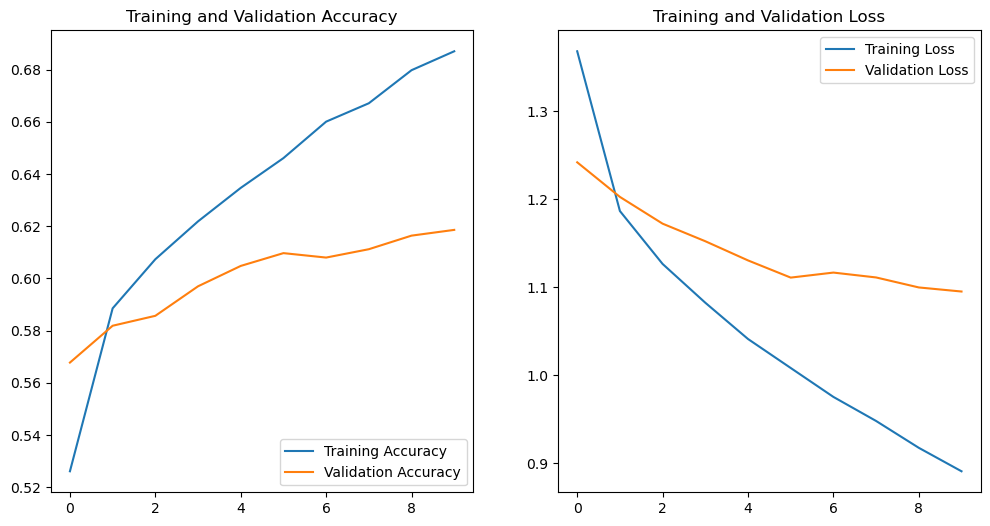

In [135]:
import matplotlib.pyplot as plt

# Plotting the training and validation accuracy/loss

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

# Plotting Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
